In [53]:
import numpy as np
import pandas as pd

In [87]:
#Read Listings CSV file into Dataframe

listings = pd.read_csv("listings.csv", low_memory= False)
calendar = pd.read_csv("calendar.csv.gz")

In [88]:
# To view data we are working with and understand shape properties

listings.shape
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200709134403,2020-07-10,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.02
1,20168,https://www.airbnb.com/rooms/20168,20200709134403,2020-07-10,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.70
2,25428,https://www.airbnb.com/rooms/25428,20200709134403,2020-07-10,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,"This nicely furnished, newly renovated apt is...",Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
3,27886,https://www.airbnb.com/rooms/27886,20200709134403,2020-07-10,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.10
4,31080,https://www.airbnb.com/rooms/31080,20200709134403,2020-07-10,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.29


# There are lot many other columns but i'm particularly interested in looking at bedrooms column and how they are related to price of the listings.
# value_counts provides unique values available for each bedroom type

In [89]:
bedrooms_val_counts = listings.bedrooms.value_counts()

bedrooms_val_counts

1.0     11537
2.0      4641
3.0      1639
0.0      1018
4.0       485
5.0        78
6.0        12
12.0        6
8.0         5
7.0         3
10.0        3
9.0         3
11.0        1
Name: bedrooms, dtype: int64

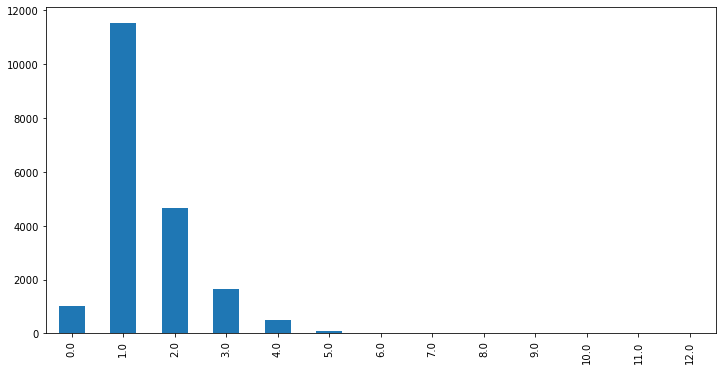

In [90]:
#we can bar chart them for better understanding.

bedrooms_val_counts.sort_index().plot.bar(figsize = (12,6))

In [91]:
#now lets look at how the listings with various bedroom counts are priced. we need to  remove '$' sign from price column and convert value to floats before performing any kind of comutations on the column.

listings.price = listings.price.replace('[\$,]','', regex= True).astype(float)

#now price is usable to get a look on how they vary with number of bedrooms for a listing.

bedrooms = listings.groupby('bedrooms')

bedrooms["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,1018.0,122.829077,167.863386,25.0,85.00,100.0,135.00,5040.0
1.0,11537.0,136.985178,251.662779,5.0,89.00,117.0,150.00,9000.0
2.0,4641.0,197.770308,113.787589,9.0,130.00,175.0,240.00,2500.0
3.0,1639.0,237.748017,174.855944,42.0,150.00,200.0,275.00,4500.0
4.0,485.0,283.496907,158.094289,35.0,180.00,250.0,350.00,1150.0
5.0,78.0,401.128205,315.365727,89.0,200.00,322.5,468.75,2000.0
6.0,12.0,532.333333,304.952853,65.0,468.75,496.5,575.00,1300.0
7.0,3.0,433.000000,300.860433,124.0,287.00,450.0,587.50,725.0
8.0,5.0,520.000000,224.944438,300.0,440.00,480.0,480.00,900.0


In [105]:
# lets now look at bar chart of the average price of the listings grouped by bedroom

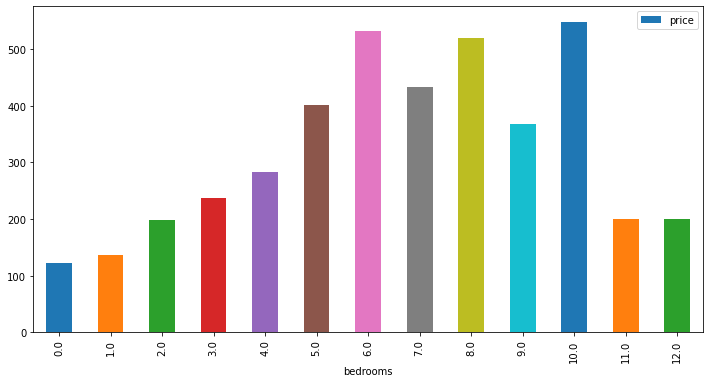

In [92]:
import matplotlib.pyplot as plt

N = 13
cmap = plt.cm.tab10
colors = cmap(np.arange(len(bedrooms)) % cmap.N)
bedrooms.mean().plot.bar(y='price', figsize = (12,6),color= colors)

plt.show()

In [ ]:
# Graph looks okay but doesnt exactly follow our intuition about how price should go up with bedroom count. we can see that 0 bedroom (couldbe studio listings) have an average price that is almost equal to single bedroom listings.
# studio listings being only lodges for single person so the prices for 1bedroom and Studios could almost be same.
# Average price listed for 11BD is low and can be removed from analysis for better understanding as there is only one listing avaiable with 11BD.

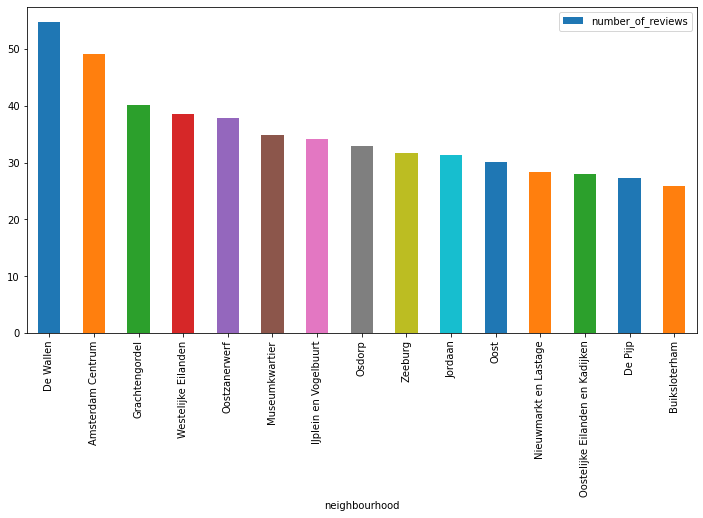

In [93]:
# Neighbourhoods with most number of reviews

rev_df = listings.groupby(['neighbourhood']).number_of_reviews.mean()
rev_df = rev_df.reset_index()
rev_df = rev_df.sort_values('number_of_reviews', ascending=[0])

rev_df.head(15).plot.bar(x = 'neighbourhood',
                        y = 'number_of_reviews',
                         figsize = (12,6),
                        color =colors)

# De Wallen and Amsterdam Centrum neighbourhoods got more number of reviews and looks like preferred by more number of users.

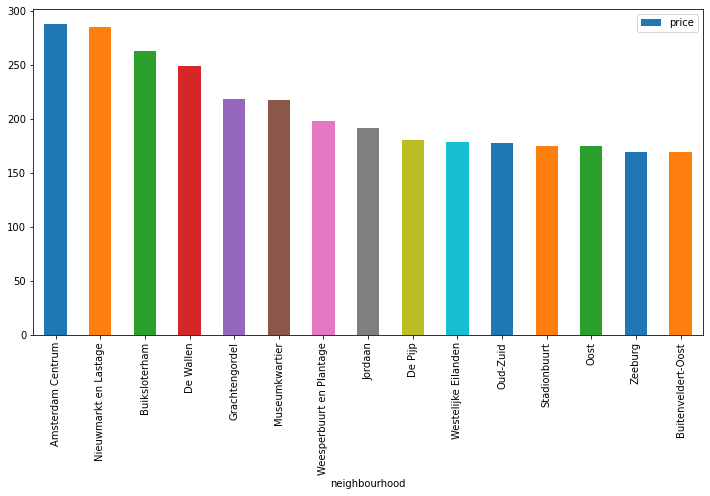

In [103]:
# Neighbourhoods with most number of reviews

rev_df = listings.groupby(['neighbourhood']).price.mean()
rev_df = rev_df.reset_index()
rev_df = rev_df.sort_values('price', ascending=[0])

rev_df.head(15).plot.bar(x = 'neighbourhood',
                        y = 'price',
                         figsize = (12,6),
                        color =colors)


# Amsterdam centrum neighbourhood has highest rental prices.

In [94]:
calendar['price'] = calendar.price.replace('[\$,]','', regex= True).astype(float)
calendar['date'] = pd.to_datetime(calendar['date'], infer_datetime_format= True)

In [95]:
timeline = calendar.groupby(['date']).price.mean()
timeline = timeline.reset_index()
timeline = timeline.sort_values(by='date', ascending=True)

timeline

,date,price
0,2020-07-09,143.596718
1,2020-07-10,161.591538
2,2020-07-11,162.006331
3,2020-07-12,158.069793
4,2020-07-13,157.897421
...,...,...
378,2021-07-22,159.850000
379,2021-07-23,163.000000
380,2021-07-24,163.000000
381,2021-07-25,159.900000


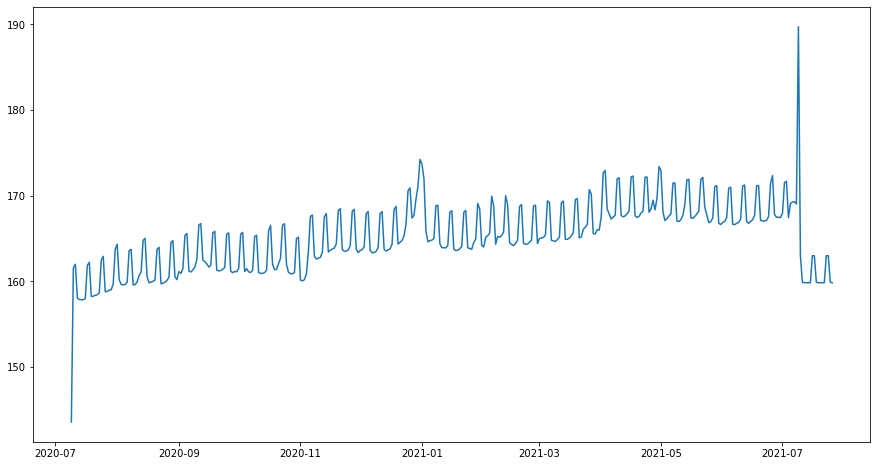

In [79]:
plt.figure(figsize=(15,8))
plt.plot(timeline['date'],timeline['price'])

# Timeline shows all listings booked and with highest price during time of the year Jul-2021